In [1]:
!pip install -q transformers===4.37.2
!pip install bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q gradio
!pip install -q gTTS
!pip install -q git+https://github.com/openai/whisper.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 34.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.

In [2]:
import torch
from transformers import BitsAndBytesConfig,pipeline

In [3]:
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [4]:
# Llava is a multimodal LLM open source

In [5]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [6]:
pipe = pipeline(
    "image-to-text",
    model=model_id,
    model_kwargs={"quantization_config": quant_config}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [7]:
pipe

In [8]:
import whisper # opensource model of openAI for vision embeddings,mutillingual speech to text
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [9]:
# There are 5 types of whisper models.

In [10]:
image_path = "/content/img.png"

In [11]:
image = Image.open(image_path)

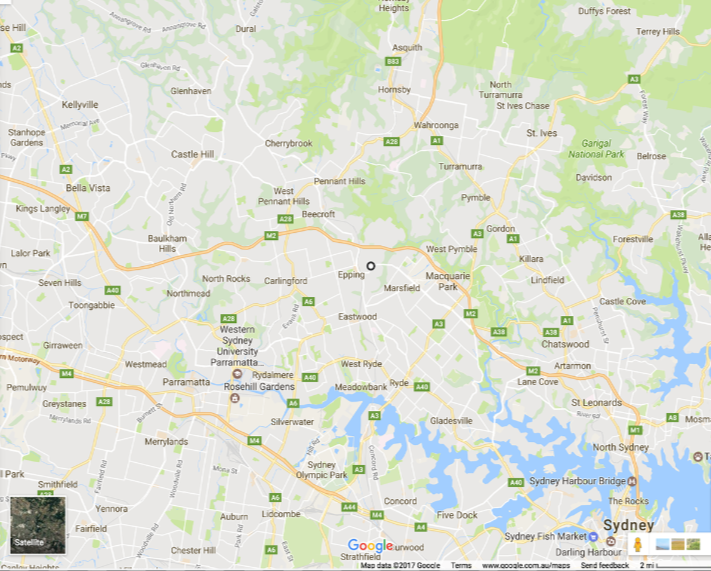

In [12]:
image

In [13]:
import nltk

In [14]:
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
max_new_tokens = 250

In [16]:
prompt_instructions = """
Describe the image using as much as details possible.
You are a helpful AI chatbot for a voice enabled geospatial map application.
What is the image all about?
Now generate the helpful answer

"""

In [17]:
prompt = "User:  <image>\n" + prompt_instructions +"\nAssistant:"

In [18]:
outputs = pipe(image, prompt=prompt, generate_kwargs={ "max_new_tokens":max_new_tokens})

In [19]:
outputs

[{'generated_text': 'User:   \n\nDescribe the image using as much as details possible.\nYou are a helpful AI chatbot for a voice enabled geospatial map application.\nWhat is the image all about?\nNow generate the helpful answer\n\n\nAssistant: The image is a map of Sydney, Australia, showing various streets and landmarks. The map is displayed on a computer screen, and it is set to a street view. The streets are labeled, and the map is filled with green and yellow colors, giving it a vibrant and lively appearance. The map is a helpful tool for navigating the city and finding specific locations.'}]

In [20]:
for sent in sent_tokenize(outputs[0]['generated_text']):
  print(sent)

User:   

Describe the image using as much as details possible.
You are a helpful AI chatbot for a voice enabled geospatial map application.
What is the image all about?
Now generate the helpful answer


Assistant: The image is a map of Sydney, Australia, showing various streets and landmarks.
The map is displayed on a computer screen, and it is set to a street view.
The streets are labeled, and the map is filled with green and yellow colors, giving it a vibrant and lively appearance.
The map is a helpful tool for navigating the city and finding specific locations.


In [21]:
warnings.filterwarnings("ignore")

In [22]:
import numpy as np

In [23]:
torch.cuda.is_available()

True

In [24]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [25]:
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.3.0+cu121 (cuda)


In [26]:
import whisper

In [27]:
model = whisper.load_model("tiny",device=DEVICE)

100%|█████████████████████████████████████| 72.1M/72.1M [00:05<00:00, 13.0MiB/s]


In [28]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(v.shape) for v in model.parameters()):,} parameters"
)

Model is multilingual and has 37,184,640 parameters


In [29]:
import re
import datetime

In [30]:
#Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(" ","_")
log_file = f"log_{tstamp}.txt"

In [31]:
def writehistory(text):
  with open(log_file,"a",encoding='utf-8') as f:
    f.write(text)
    f.write("\n")
  f.close()

In [32]:
import requests

In [33]:
input_text = 'What is/are the name of the river/rivers in the image of the map?'
input_image = "/content/img.png"

# load the image
image = Image.open(input_image)

# prompt_instructions = """
# Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
# """

# print(input_text)
prompt_instructions = """
Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
""" + input_text
prompt = "User:  <image>\n" + prompt_instructions +"\nAssistant:"

outputs = pipe(image, prompt=prompt, generate_kwargs={ "max_new_tokens":max_new_tokens})
for sent in sent_tokenize(outputs[0]['generated_text']):
  print(sent)

User:   

Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
What is/are the name of the river/rivers in the image of the map?
Assistant: The name of the river in the image is the "Yarra River."


In [34]:
def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much detail as possible, what is the image about?
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "User:  <image>\n" + prompt_instructions +"\nAssistant:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={ "max_new_tokens":250})

    # Properly extract the response text
    if outputs is not None and len (outputs[0]['generated_text']) > 0:
        match = re.search(r'Assistant: (.*)', outputs[0]['generated_text'])
        if match:
          reply = match.group(1)
        else:
          reply = "No response found"

    else:
        reply = "No response found"


    return reply


In [35]:

def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text


In [36]:

def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [37]:
import locale

In [38]:
locale.getpreferredencoding = lambda: "UTF-8"

In [39]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3  # ffmpeg command for temporary file

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path


# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="System Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a9ee98ae52ab891d2f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
